# Actividad 3-4. Algoritmo de clustering jerárquico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Amazon.xlsx")
data1 = data.drop(["Unnamed: 0"], axis =1)
data1

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,205,3,345,235,24,23,26,21,17
1,9,15,315,33,25,4,42,215,28
2,17,26,285,3,43,27,41,26,33
3,135,5,355,295,18,23,39,195,17
4,3,45,48,39,34,46,225,34,43
...,...,...,...,...,...,...,...,...,...
95,3,8,32,25,7,21,42,17,1
96,305,25,46,24,33,28,355,26,45
97,1,14,26,25,24,27,42,185,23
98,155,11,335,34,26,29,42,215,27


### 1. Estandarización de los datos a usar

In [3]:
## Estandarización de los datos

from sklearn.preprocessing import normalize 
data_est = normalize(data1)
data_est

array([[0.43826336, 0.00641361, 0.73756517, 0.50239946, 0.05130888,
        0.04917101, 0.05558462, 0.04489527, 0.03634379],
       [0.02323527, 0.03872544, 0.81323434, 0.08519598, 0.06454241,
        0.01032679, 0.10843125, 0.55506471, 0.0722875 ],
       [0.05723452, 0.08753514, 0.95951982, 0.01010021, 0.14476966,
        0.09090188, 0.13803618, 0.08753514, 0.11110229],
       [0.25885639, 0.00958727, 0.68069644, 0.56564916, 0.03451419,
        0.04410146, 0.07478074, 0.37390368, 0.03259673],
       [0.01197502, 0.17962533, 0.19160036, 0.15567529, 0.13571692,
        0.18361701, 0.89812667, 0.13571692, 0.17164198],
       [0.14494006, 0.251738  , 0.60264551, 0.03661644, 0.03966781,
        0.02898801, 0.73995715, 0.03356507, 0.00457705],
       [0.04755854, 0.02481315, 0.98218723, 0.06823617, 0.07237169,
        0.09304932, 0.07857498, 0.05996511, 0.06410064],
       [0.13323393, 0.04304481, 0.06354234, 0.52268696, 0.05739308,
        0.04509456, 0.70716471, 0.44069685, 0.05944283],


In [4]:
data_scaled = pd.DataFrame(data_est, columns = data1.columns)
data_scaled

,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.438263,0.006414,0.737565,0.502399,0.051309,0.049171,0.055585,0.044895,0.036344
1,0.023235,0.038725,0.813234,0.085196,0.064542,0.010327,0.108431,0.555065,0.072287
2,0.057235,0.087535,0.959520,0.010100,0.144770,0.090902,0.138036,0.087535,0.111102
3,0.258856,0.009587,0.680696,0.565649,0.034514,0.044101,0.074781,0.373904,0.032597
4,0.011975,0.179625,0.191600,0.155675,0.135717,0.183617,0.898127,0.135717,0.171642
...,...,...,...,...,...,...,...,...,...
95,0.045932,0.122484,0.489936,0.382763,0.107174,0.321521,0.643041,0.260279,0.015311
96,0.640241,0.052479,0.096561,0.050380,0.069272,0.058776,0.745198,0.054578,0.094462
97,0.005043,0.070602,0.131118,0.126075,0.121032,0.136161,0.211805,0.932952,0.115989
98,0.357707,0.025386,0.773109,0.078465,0.060003,0.066926,0.096927,0.496175,0.062310


### 2. Aplicación del algoritmo de clustering jerárquico y su graficación

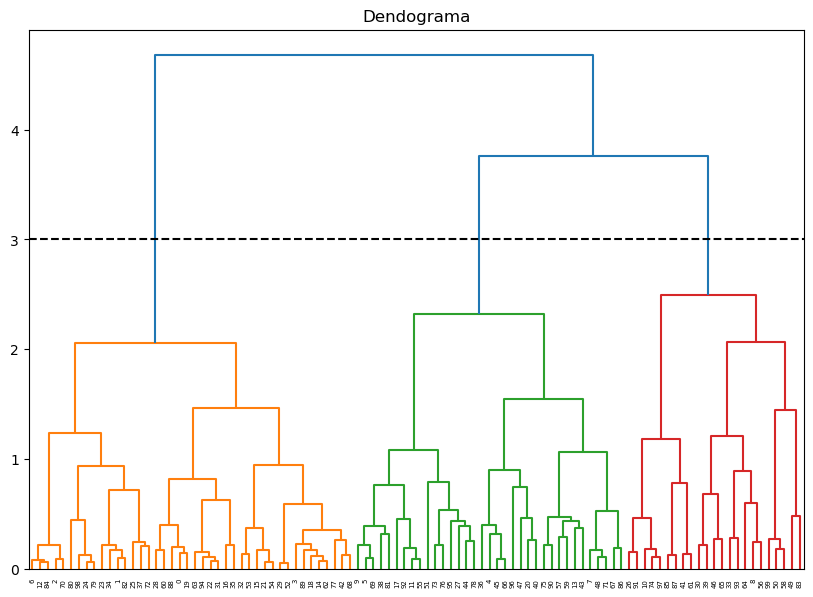

In [5]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7)) ## Definir tamaño del gráfico
plt.title("Dendograma")

dend = shc.dendrogram(shc.linkage(data_scaled, method = "ward")) ## Creación del dendograma
plt.axhline(y=3, color = "black", linestyle= "--")

In [6]:
## Agrupación de los datos

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage = "ward") ## Código para clustering jerarquico
grupos = cluster.fit_predict(data_scaled)
grupos

array([1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 0,
       2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0], dtype=int64)

In [7]:
agrupaciones = pd.DataFrame(grupos, columns=["Grupo"])
agrupaciones

,Grupo
0,1
1,1
2,1
3,1
4,2
...,...
95,2
96,2
97,0
98,1


## 3. Creación del DataFrame con los grupos asignados

In [8]:
pd.options.display.max_rows = None

DataFrame_agrupado = pd.concat([data, agrupaciones], axis=1, join="inner")
DataFrame_agrupado["Grupo"] = DataFrame_agrupado["Grupo"].astype("str")
DataFrame_agrupado

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,2
5,Fabian,95,165,395,24,26,19,485,22,3,2
6,Philip,23,12,475,33,35,45,38,29,31,1
7,Frank,65,21,31,255,28,22,345,215,29,2
8,Xavier,275,8,47,235,35,3,38,27,48,0
9,Gabriel,2,175,325,3,37,32,435,27,39,2


In [9]:
## División de varios DataFrames de los distintos grupos para recomendaciones
GruposTot = DataFrame_agrupado.set_index("Grupo")
GruposTot

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
Grupo,,,,,,,,,,
1,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
1,Bernard,17,26,285,3,43,27,41,26,33
1,Edward,135,5,355,295,18,23,39,195,17
2,Emilia,3,45,48,39,34,46,225,34,43
2,Fabian,95,165,395,24,26,19,485,22,3
1,Philip,23,12,475,33,35,45,38,29,31
2,Frank,65,21,31,255,28,22,345,215,29
0,Xavier,275,8,47,235,35,3,38,27,48


In [10]:
Grupo0 = GruposTot.loc["0"] 
Grupo0

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
Grupo,,,,,,,,,,
0,Xavier,275,8,47,235,35,3,38,27,48
0,Marisol,12,8,44,24,2,28,29,215,17
0,Florent,12,75,33,24,19,25,36,185,21
0,Herman,15,16,3,265,31,3,4,165,28
0,Isadore,17,185,32,285,35,34,42,19,32
0,John,12,1,32,225,21,22,44,165,13
0,Josephine,295,45,48,39,34,46,225,335,43
0,Lawrence,155,95,5,225,26,32,19,245,4
0,Leonid,27,105,4,15,38,14,26,19,38


In [11]:
Grupo1 = GruposTot.loc["1"] 
Grupo1

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
Grupo,,,,,,,,,,
1,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
1,Bernard,17,26,285,3,43,27,41,26,33
1,Edward,135,5,355,295,18,23,39,195,17
1,Philip,23,12,475,33,35,45,38,29,31
1,Irene,14,7,405,19,21,14,33,22,24
1,Isidore,235,65,495,335,3,26,34,295,39
1,Joseph,17,1,485,235,27,17,24,235,34
1,Eugene,16,205,285,255,36,29,31,22,23


In [12]:
Grupo2 = GruposTot.loc["2"] 
Grupo2

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
Grupo,,,,,,,,,,
2,Emilia,3,45,48,39,34,46,225,34,43
2,Fabian,95,165,395,24,26,19,485,22,3
2,Frank,65,21,31,255,28,22,345,215,29
2,Gabriel,2,175,325,3,37,32,435,27,39
2,Henry,195,11,455,23,3,25,415,25,32
2,Isabelle,185,75,43,285,27,37,335,25,23
2,Eugenia,245,9,385,215,34,15,295,28,25
2,Evdokia,165,45,43,2,21,18,315,225,26
2,Florence,26,65,485,305,32,39,335,29,39


## 4. Recomendaciones de productos

### Salome (Grupo 2)
-A Salome le recomendaría el producto de imagen 35 comprado por Magdalyna, esto porque posee un menor precio, mayor velocidad de entrega y mejor durabilidad, además el servicio de retorno es similar, el tamaño del paquete entra dentro de lo esperado y el número de estrellas es igual que lo adquirido por Salome, por lo que puede ser una buena opción de compra.

-También le recomendaría el producto de imagen 39 comprado por Sylvester, porque tiene características muy parecidas a lo comprado por Salome, así como una mejor velocidad de entrega, menor precio y durabilidad similar, menor tamaño del paquete y un número de estrellas similar, por lo que sería una buena alternativa para Salome.

### Stephania (Grupo 1)
-A Stephania le recomendaría el producto de imagen 225 comprado por Judith, esto porque el producto cumple con muchas de las especificaciones que tienen los productos comprados por Stephania, además tiene una velocidad de entrega mayor, misma durabilidad, un precio un poco menor, mayor valor educativo, mejor servicio de retorno y menor tamaño de paquete, lo que podría ser una buena opción de compra para Stephania.

-También le recomendaría el producto de imagen 185 comprado por Maura, debido a que cuenta con un número de estrellas similar a
los comprados por Stephania, además de que la velocidad de entrega es mayor, el precio es relativamente menor a lo adquirido por Stephania, la durabilidad es muy parecida y posee mayor valor educativo y servicio de retorno. 

### Lydia (Grupo 1)
-A Lydia le recomendaría el producto de imagen 23 comprado por Myroslav, esto porque la calidad del producto es superior a los comprados por Lydia, el precio no se eleva mucho y queda dentro de los productos escogidos por Lydia, además la velocidad de entrega es mayor, el tamaño del paquete es muy parecido y la durabilidad del producto es igual a los que ha comprado Lydia.

-También le recomendaría el producto de imagen 295 comprado por Lourdes, ya que mejora mucho la durabilidad, la calidad del producto y el número de estrellas de lo anteriormente comprado por Lydia, ademas de que la velocidad de entrega es casi la misma, tiene mayor valor educativo y menor tamaño, lo que lo convierte en un producto ideal para el perfil de Lydia.